<a href="https://colab.research.google.com/github/Rushikesh3005/Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding='latin1')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#checking for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
len(df[df.duplicated()])


0

### Exploratory Data Analysis

In [ ]:
df1=df.groupby(['Seasons','Rented Bike Count']).sum().reset_index().groupby('Seasons').sum()
df1['Season'] = df1.index
df1.reset_index(drop=True, inplace=True)
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Season
0,1216580,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,Autumn
1,1180979,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,Spring
2,1609196,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,Summer
3,170001,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,Winter


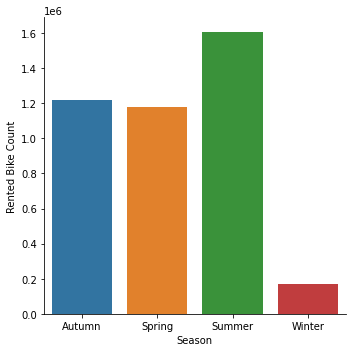

In [ ]:
sns.catplot(x="Season", y="Rented Bike Count",  data=df1, kind="bar")

In [ ]:
df2=df.groupby(['Holiday','Rented Bike Count']).sum().reset_index().groupby('Holiday').sum()
df2['Holiday'] = df2.index
df2.reset_index(drop=True, inplace=True)
df2

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday
0,200573,4968,4298.3,23212,790.4,657366,106.2,237.49,33.7,22.0,Holiday
1,2526164,95772,108556.1,486850,14319.8,11929228,35580.4,4747.92,1268.8,635.6,No Holiday


In [ ]:
df.groupby(['Holiday']).count()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
Holiday,,,,,,,,,,,,,
Holiday,432,432,432,432,432,432,432,432,432,432,432,432,432
No Holiday,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328


In [ ]:
avg_rented_bikes_on_holiday= 200573	/432
avg_rented_bikes_on_holiday

464.28935185185185

In [ ]:
avg_rented_bikes_on_no_holiday= 2526164/	8328
avg_rented_bikes_on_no_holiday

303.33381364073006

In [ ]:
data = {"Holiday":["holiday", "no holiday"], "avg_bike_count":[464.28,303.33]}
df3=pd.DataFrame(data)
df3

,Holiday,avg_bike_count
0,holiday,464.28
1,no holiday,303.33


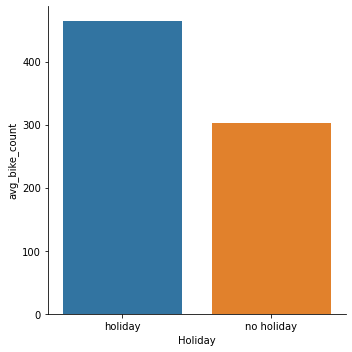

In [ ]:
sns.catplot(x="Holiday", y="avg_bike_count",  data=df3, kind="bar")

#Rented Bike counts on Functioning & Non Functioning Day

In [ ]:
df4=df.groupby(['Functioning Day','Rented Bike Count']).sum().reset_index().groupby('Functioning Day').sum()
df4['Functioning Day'] = df4.index
df4.reset_index(drop=True, inplace=True)
df4

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,0,3333,4747.4,17846,500.6,448855,2292.2,178.41,40.2,0.0,No
1,2550398,97407,108107.0,492216,14609.6,12137739,33394.4,4807.00,1262.3,657.6,Yes


In [ ]:
#seperate out list of numeric features
numeric_features = df.describe().columns
numeric_features=list(numeric_features)
numeric_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

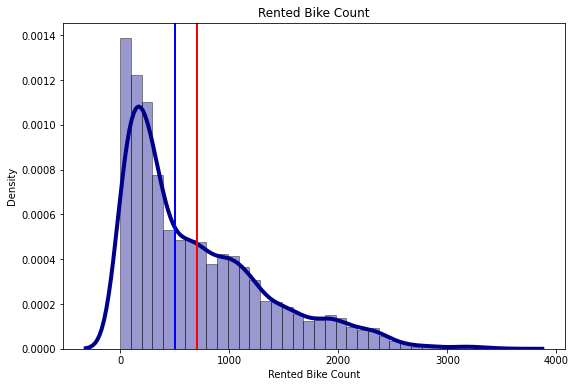

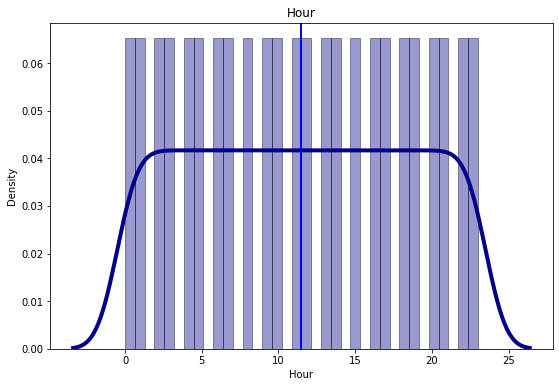

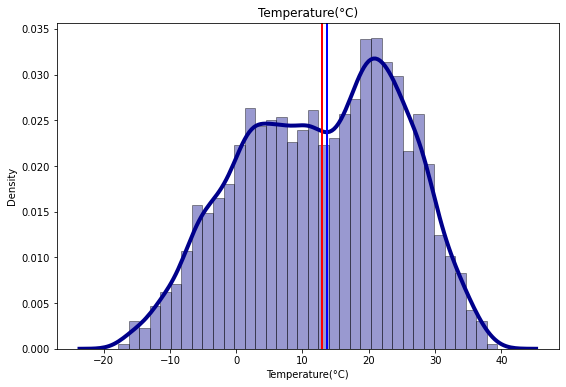

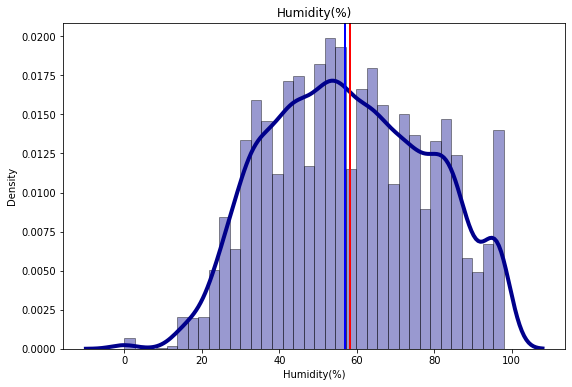

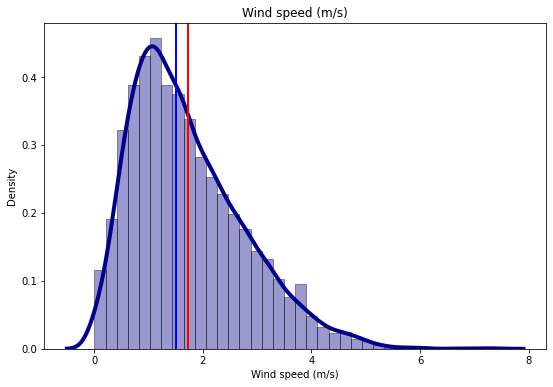

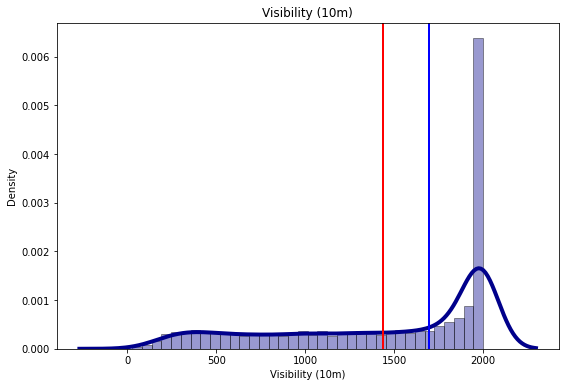

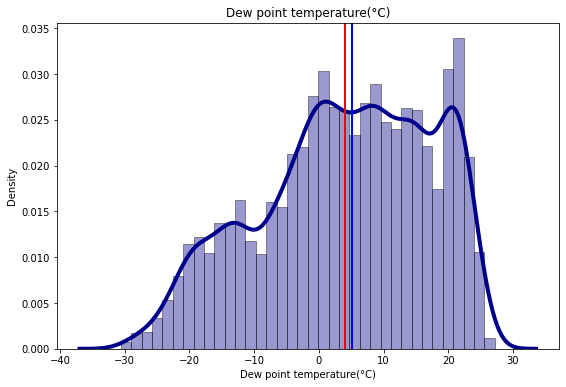

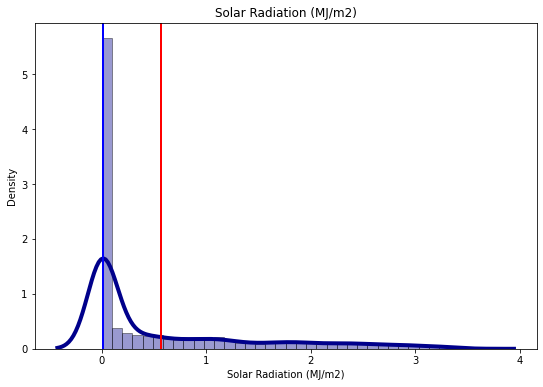

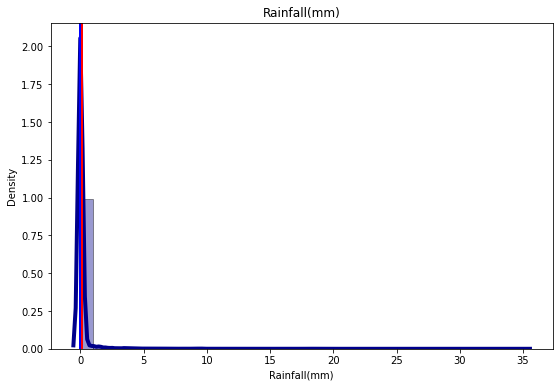

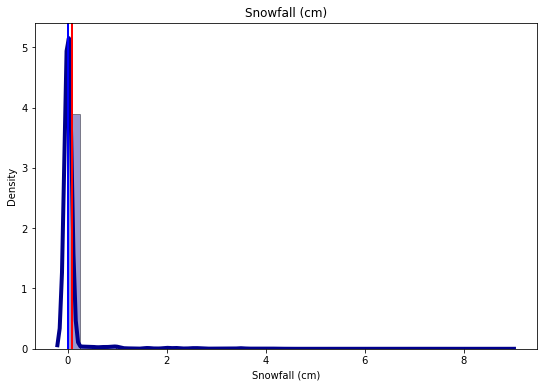

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax.axvline(feature.mean(), color='r', linewidth=2)
    ax.axvline(feature.median(), color='b', linewidth=2)
    ax.set_title(col)
plt.show()

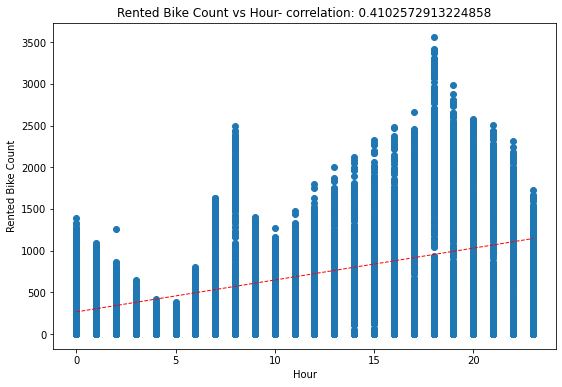

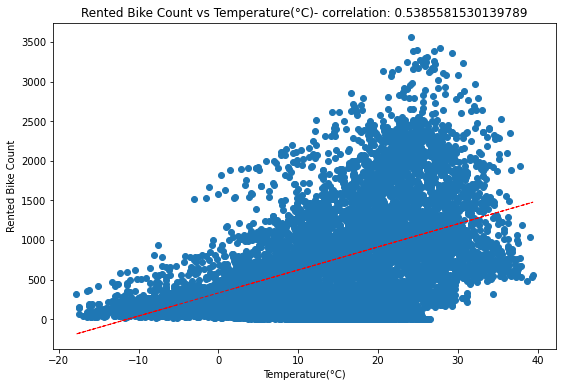

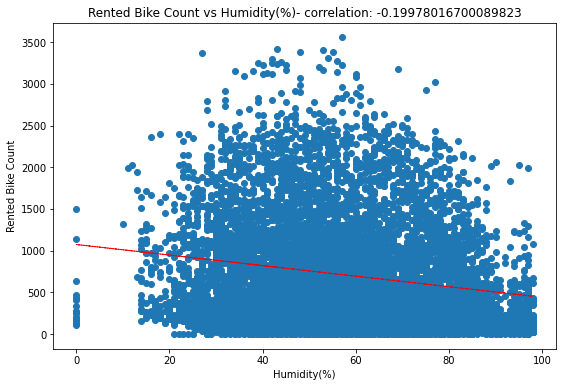

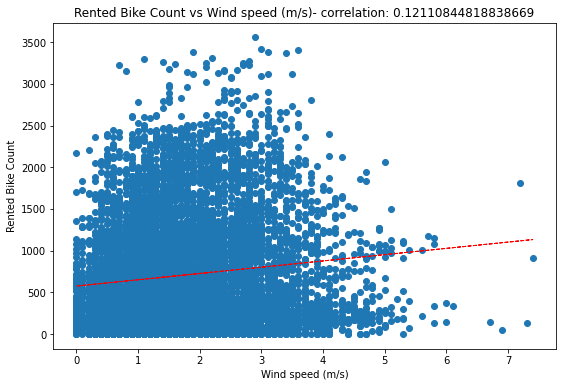

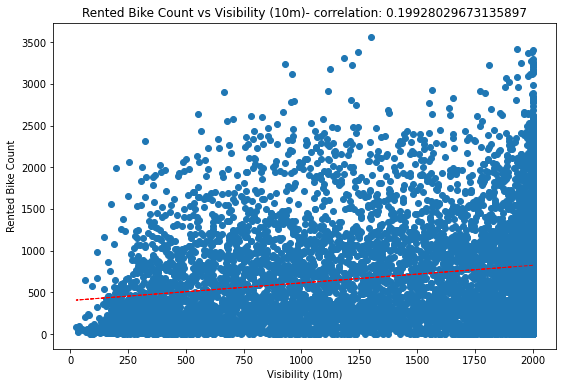

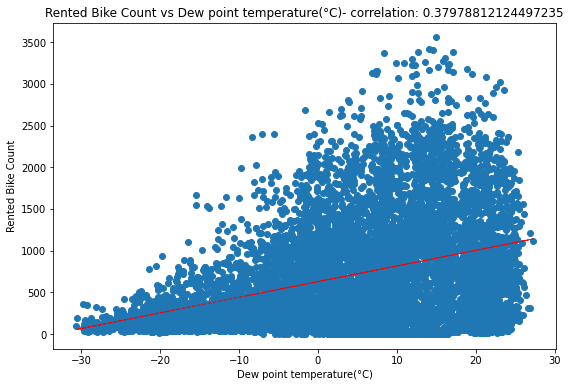

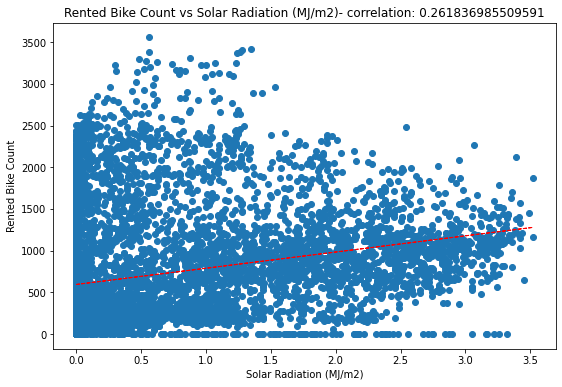

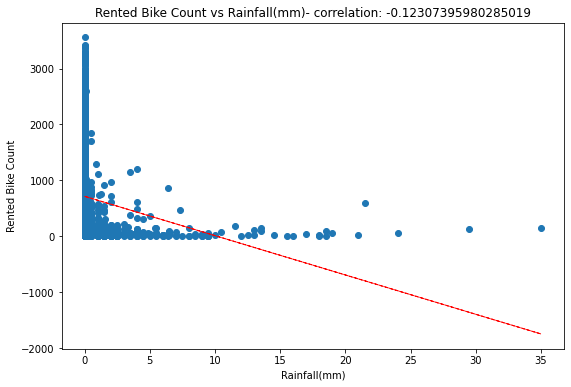

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

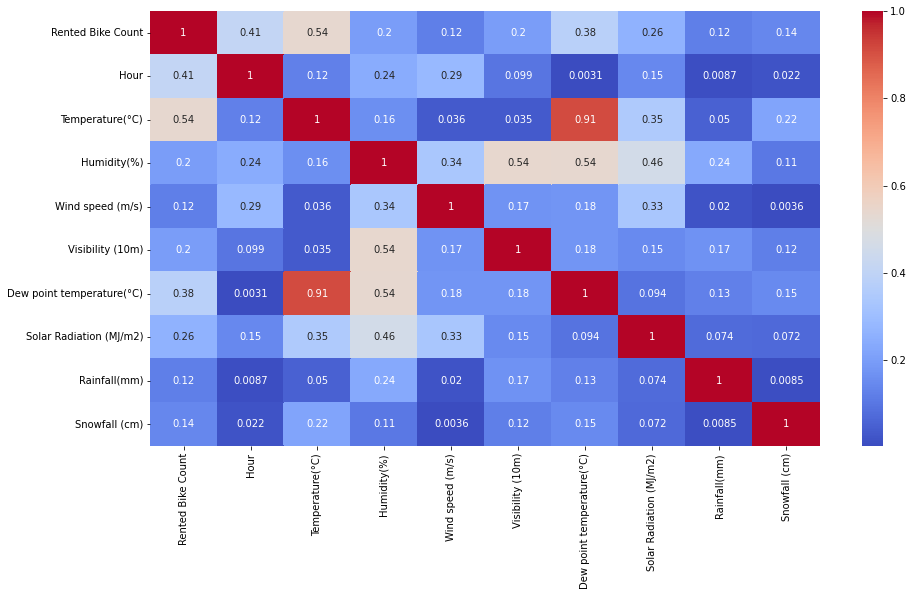

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count	','Date']]])

,variables,VIF
0,Rented Bike Count,4.128938
1,Hour,5.043107
2,Temperature(°C),36.351729
3,Humidity(%),5.507031
4,Wind speed (m/s),4.806546
5,Visibility (10m),9.104336
6,Dew point temperature(°C),17.334133
7,Solar Radiation (MJ/m2),2.914067
8,Rainfall(mm),1.104359
9,Snowfall (cm),1.121057


In [ ]:
numeric_features=[
 'Hour','Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)','Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:

import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [ ]:
cat_features=['Date','Seasons','Holiday','Functioning Day']

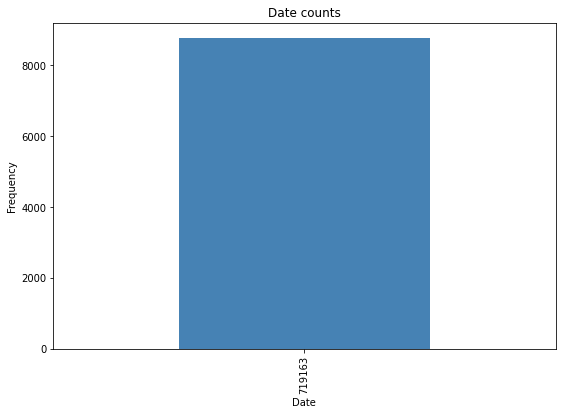

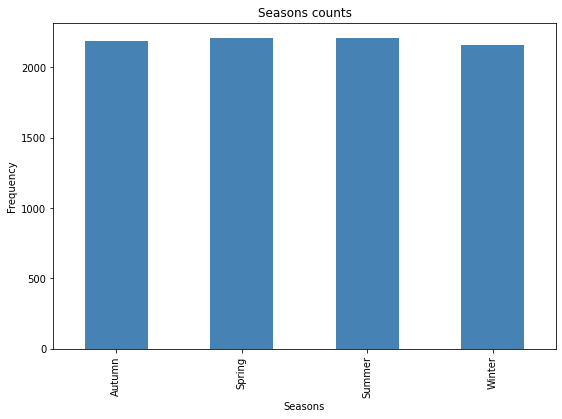

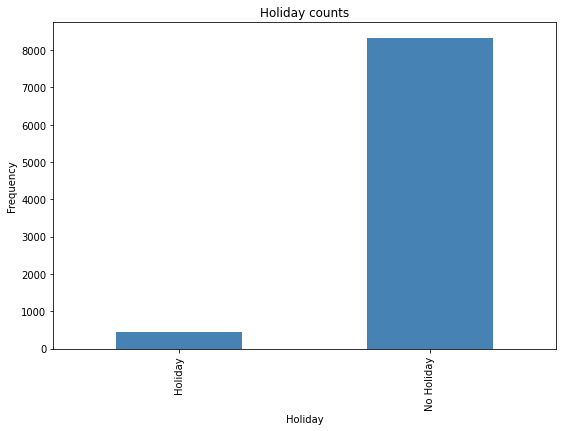

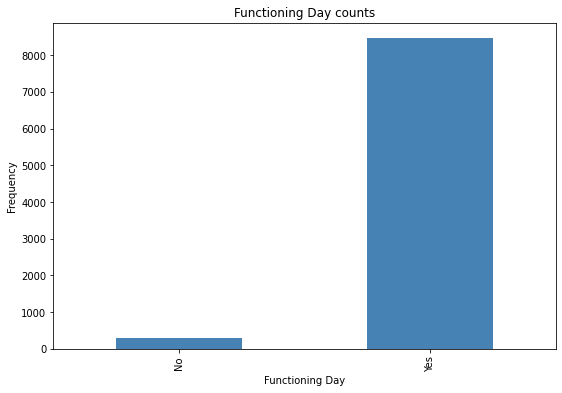

In [ ]:
for col in cat_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

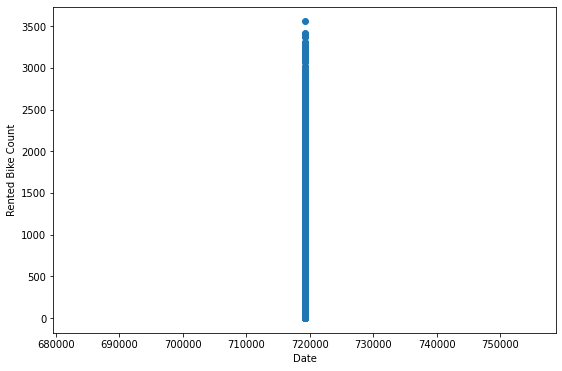

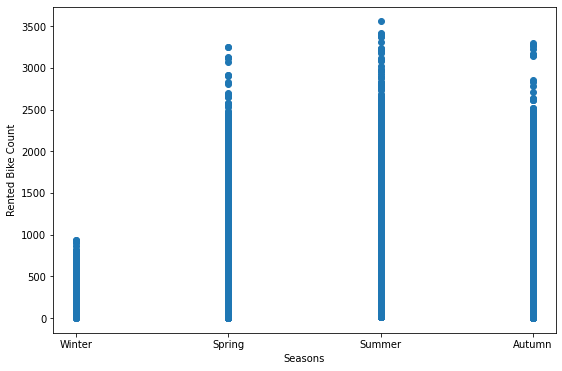

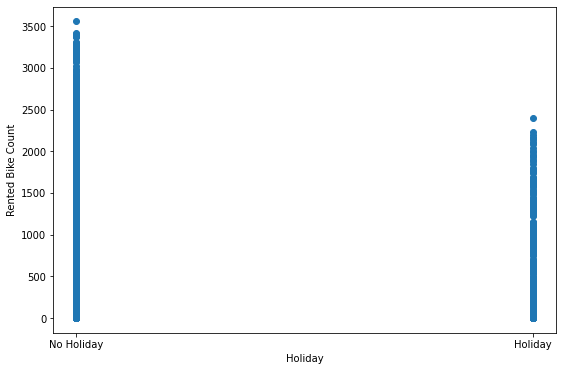

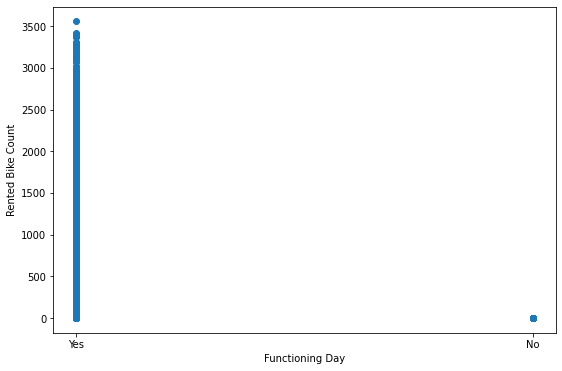

In [ ]:
for col in cat_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')

plt.show()

In [ ]:
df_copy=df.copy()

In [ ]:
#label encoding
encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning Day":{"Yes":1,"No":0},

                 }
df_copy = df_copy.replace(encoders_nums)

In [ ]:
# One hot encoding
df_copy = pd.get_dummies(df_copy, columns=["Seasons"])

In [ ]:
df_copy

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,719163,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,719163,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,719163,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,719163,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,719163,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,719163,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1,0,0,0
8756,719163,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1,0,0,0
8757,719163,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1,0,0,0
8758,719163,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1,0,0,0


In [ ]:
features = numeric_features.copy()
features.extend(['Seasons_Autumn','Date',	'Seasons_Spring',	'Seasons_Summer',	'Seasons_Winter','Holiday','Functioning Day'])

In [ ]:
features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons_Autumn',
 'Date',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday',
 'Functioning Day']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_copy)

MinMaxScaler()

In [ ]:

X = df_copy[features]

In [ ]:
y = (df_copy['Rented Bike Count'])

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


#linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.5516435713892203

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 190609.2650828808
RMSE : 436.58820996779195


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5445663619093559
Adjusted R2 :  0.5403663975235056


#Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor().fit(X_train, y_train)



In [ ]:
reg.score(X_train, y_train)

0.9820062106407558

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 231.72,  487.51,  382.11, ...,  448.33, 1279.34,  709.33])

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 54277.86620188357
RMSE : 232.97610650425844


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8703107844134843
Adjusted R2 :  0.8691148031746461


#Decision Tree Regressor

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_train, y_train, cv=10)

array([0.71914264, 0.75208023, 0.77919547, 0.76238703, 0.70838375,
       0.77600312, 0.77984864, 0.73509509, 0.77568686, 0.7918681 ])

In [ ]:
reg=regressor.fit(X_train, y_train)


In [ ]:
reg.score(X_train, y_train)

1.0

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 262.,  493.,  239., ...,  643., 1256.,  689.])

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 102578.74828767123
RMSE : 320.2791724225464


In [ ]:
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7549027194290652
Adjusted R2 :  0.7526424563229355


#Gboost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)


##Model Training

In [ ]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
reg.score(X_train, y_train)

0.8547195238595858

##Model Testing

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 234.10577574,  569.53594845,  353.66889522, ...,  417.20523701,
       1144.08599466,  603.4606919 ])

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 68068.94670245054
RMSE : 260.90026198233403


In [ ]:
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8373589656084379
Adjusted R2 :  0.8358591059252881


#CONCLUSION:-

#Model Tested
##1.Linear Regression
##2.Random Forest regressor
##3.Decision tree
##4.Gradient Boost Regressor

##From above tested models Random forest Regressor gives better prediction compared to other models